In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import probplot

In [2]:
data=pd.read_csv("Twitter_combined_data.csv")

In [3]:
data.head()

,url,full_text,retweet_count,views_count
0,https://twitter.com/TheReportify/status/174739...,JUST IN: Joni Simpson appointed as Director fo...,0,35
1,https://twitter.com/ILOColombo/status/17472135...,The @ilo country office for #SriLanka and the ...,1,1369
2,https://twitter.com/Juliett59778255/status/172...,Biden spending $17 million on 'social cohesion...,1,6
3,https://twitter.com/Real_AnTheFacts/status/172...,WASTE OF THE DAY: Throwing $17 million of taxp...,41,2028
4,https://twitter.com/kunleaden/status/172472393...,At the ongoing 7th Asia Pacific Population Con...,5,569


In [4]:
data.columns

Index(['url', 'full_text', 'retweet_count', 'views_count'], dtype='object')

In [5]:
print('length of data is', len(data))

length of data is 4229


In [6]:
data.shape

(4229, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            4229 non-null   object
 1   full_text      4229 non-null   object
 2   retweet_count  4229 non-null   int64 
 3   views_count    4229 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 132.3+ KB


In [8]:
data.dtypes

url              object
full_text        object
retweet_count     int64
views_count       int64
dtype: object

In [9]:
#checking for null values
np.sum(data.isnull().any(axis=1))

0

In [10]:
#Getting infromation about Rows and Columns in Dataset
print('Count of columns in the data is:  ', len(data.columns))
print('Count of rows in the data is:  ', len(data))

Count of columns in the data is:   4
Count of rows in the data is:   4229


In [11]:
data.head()

,url,full_text,retweet_count,views_count
0,https://twitter.com/TheReportify/status/174739...,JUST IN: Joni Simpson appointed as Director fo...,0,35
1,https://twitter.com/ILOColombo/status/17472135...,The @ilo country office for #SriLanka and the ...,1,1369
2,https://twitter.com/Juliett59778255/status/172...,Biden spending $17 million on 'social cohesion...,1,6
3,https://twitter.com/Real_AnTheFacts/status/172...,WASTE OF THE DAY: Throwing $17 million of taxp...,41,2028
4,https://twitter.com/kunleaden/status/172472393...,At the ongoing 7th Asia Pacific Population Con...,5,569


In [12]:
# Dropping URL column and unnamed column as it is not needed
data = data.drop(columns = 'url', axis = 1)

In [13]:
data.head()

,full_text,retweet_count,views_count
0,JUST IN: Joni Simpson appointed as Director fo...,0,35
1,The @ilo country office for #SriLanka and the ...,1,1369
2,Biden spending $17 million on 'social cohesion...,1,6
3,WASTE OF THE DAY: Throwing $17 million of taxp...,41,2028
4,At the ongoing 7th Asia Pacific Population Con...,5,569


In [14]:
data['full_text'][0]

'JUST IN: Joni Simpson appointed as Director for ILO Sri Lanka and Maldives, bringing extensive experience in gender equality and inclusion. #SriLanka #Maldives #ILO'

In [15]:
#converting texts in lower case
data['full_text']=data['full_text'].str.lower()
data['full_text'][0]

'just in: joni simpson appointed as director for ilo sri lanka and maldives, bringing extensive experience in gender equality and inclusion. #srilanka #maldives #ilo'

In [16]:
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  

In [17]:
#Download stop words in english language
nltk.download("stopwords")
stops=set(stopwords.words('english'))
punctuations=list(string.punctuation)
words_to_remove = ['said', 'also']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajkr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
print('Stop words\n')
print(stops)

Stop words

{'himself', 'him', 'she', 'your', 'most', "couldn't", 'you', 'doing', "don't", 'over', 'more', 'this', 'now', 't', "needn't", 'why', 'very', 'those', 're', "hadn't", 'again', 'above', 'we', 'there', 'each', "didn't", 'her', 'on', 'how', 'have', 'few', 'them', 'to', 'is', 'was', 'been', 'don', 've', 'where', 'won', 'here', 'both', 'our', 'd', "aren't", 'mustn', 'then', 'no', 'after', 'needn', 'some', 'because', 'through', 'the', 'shouldn', 'own', "you've", 'or', 'hadn', 'these', 'at', 'as', "weren't", 'doesn', 'am', 'which', 'but', 'isn', "isn't", 'its', 'shan', 'while', 'with', 'a', 'during', 'not', "mightn't", 'having', 'of', 'll', 'that', 'any', 'herself', 'be', "she's", 'against', 'y', "it's", 'for', "hasn't", "shouldn't", 'did', 'if', "wasn't", 'he', "you'll", "should've", 'nor', 'will', 'being', 'they', 'so', 'couldn', 'yourself', 'same', 'haven', 'wouldn', 'themselves', 'itself', 'such', 'yourselves', 'out', "won't", 'hasn', 'aren', 'had', 'theirs', 'off', 'hers', 'wh

In [19]:
print('\nPunctuation\n')
print(string.punctuation)


Punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
def clean(q):

    words = q.split()

    # Initialize an empty list to store cleaned words
    cleaned_words = []

    # Iterate through the words and check if they are in the list of stop words
    for word in words:
        if word not in stops:
            cleaned_words.append(word)

    # Join the cleaned words into a single string with spaces
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

In [21]:
data['full_text'] = data['full_text'].apply(clean)

In [22]:
data['full_text'][0]

'in: joni simpson appointed director ilo sri lanka maldives, bringing extensive experience gender equality inclusion. #srilanka #maldives #ilo'

In [23]:
#cleaning urls if present in tweets text
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['full_text'] = data['full_text'].apply(lambda x: cleaning_URLs(x))

In [24]:
# Function to preprocess the data
def preprocess(q):

    q=str(q).lower().strip()

    q = q.replace("$","dollar")
    q = q.replace("₹","rupee")
    q = q.replace("%","percent")
    q = q.replace("@","at")
    q = q.replace("€","euro")

    q = q.replace('[math]', '')

    q = q.replace(', 000,000,000', 'b ')
    q = q.replace(', 000,000', 'm ')
    q = q.replace(', 000', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)


    #decontracting words
    contractions = {
    "ain't": "am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ill", " will")

    #removing html tags
    q = BeautifulSoup(q)
    q = q.get_text()

    #removing punctuations
    pattern = re.compile('\W')

    q=re.sub(pattern , ' ', q).strip()

    return q

In [25]:
data['full_text'] = data['full_text'].apply(preprocess)

C:\Users\rajkr\AppData\Local\Temp\ipykernel_13968\3832438788.py:156: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [26]:
data.full_text[0]

'in  joni simpson appointed director ilo sri lanka maldives  bringing extensive experience gender equality inclusion   srilanka  maldives  ilo'

In [27]:
# Tokenize and Lemmatize the txt
# tokenization is the process of splitting text into individual words or phrases,
from nltk.tokenize import wordpunct_tokenize
def tokenize_text(text):
    return wordpunct_tokenize(text)

# Apply the tokenize_text function to create a new 'Tokenized_Text' column
data['Tokenized_Text'] = data['full_text'].apply(tokenize_text)

In [28]:
data.head()

,full_text,retweet_count,views_count,Tokenized_Text
0,in joni simpson appointed director ilo sri la...,0,35,"[in, joni, simpson, appointed, director, ilo, ..."
1,atilo country office srilanka maldives welco...,1,1369,"[atilo, country, office, srilanka, maldives, w..."
2,biden spending dollar17 million social cohesi...,1,6,"[biden, spending, dollar17, million, social, c..."
3,waste day throwing dollar17 million taxpayer ...,41,2028,"[waste, day, throwing, dollar17, million, taxp..."
4,ongoing 7th asia pacific population conference...,5,569,"[ongoing, 7th, asia, pacific, population, conf..."


Stemming:-Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.


Consider the words:

learn
learning
learned
learnt
All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

happy
happi

We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.ness
happier

In [29]:
# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = []

for word in data.full_text:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list
data['Tweets steam']=tweets_stem

In [30]:
data.head()

,full_text,retweet_count,views_count,Tokenized_Text,Tweets steam
0,in joni simpson appointed director ilo sri la...,0,35,"[in, joni, simpson, appointed, director, ilo, ...",in joni simpson appointed director ilo sri la...
1,atilo country office srilanka maldives welco...,1,1369,"[atilo, country, office, srilanka, maldives, w...",atilo country office srilanka maldives welco...
2,biden spending dollar17 million social cohesi...,1,6,"[biden, spending, dollar17, million, social, c...",biden spending dollar17 million social cohesi...
3,waste day throwing dollar17 million taxpayer ...,41,2028,"[waste, day, throwing, dollar17, million, taxp...",waste day throwing dollar17 million taxpayer ...
4,ongoing 7th asia pacific population conference...,5,569,"[ongoing, 7th, asia, pacific, population, conf...",ongoing 7th asia pacific population conference...


In [31]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [32]:
#Applying Lemmatizer
def lemmatize_text(text):
    doc = nlp (text)
    return " ".join([token.lemma_ for token in doc])

# Apply the lemmatize_text function to create a new 'Lemmatized_Text' column
data['Lemmatized_Text'] = data['full_text'].apply(lemmatize_text)

In [33]:
data.head()

,full_text,retweet_count,views_count,Tokenized_Text,Tweets steam,Lemmatized_Text
0,in joni simpson appointed director ilo sri la...,0,35,"[in, joni, simpson, appointed, director, ilo, ...",in joni simpson appointed director ilo sri la...,in joni simpson appoint director ilo sri lan...
1,atilo country office srilanka maldives welco...,1,1369,"[atilo, country, office, srilanka, maldives, w...",atilo country office srilanka maldives welco...,atilo country office srilanka maldive welc...
2,biden spending dollar17 million social cohesi...,1,6,"[biden, spending, dollar17, million, social, c...",biden spending dollar17 million social cohesi...,biden spending dollar17 million social cohes...
3,waste day throwing dollar17 million taxpayer ...,41,2028,"[waste, day, throwing, dollar17, million, taxp...",waste day throwing dollar17 million taxpayer ...,waste day throw dollar17 million taxpayer do...
4,ongoing 7th asia pacific population conference...,5,569,"[ongoing, 7th, asia, pacific, population, conf...",ongoing 7th asia pacific population conference...,ongoing 7th asia pacific population conference...


In [34]:
data.Lemmatized_Text[0]

'in   joni simpson appoint director ilo sri lanka maldive   bring extensive experience gender equality inclusion    srilanka   maldive   ilo'

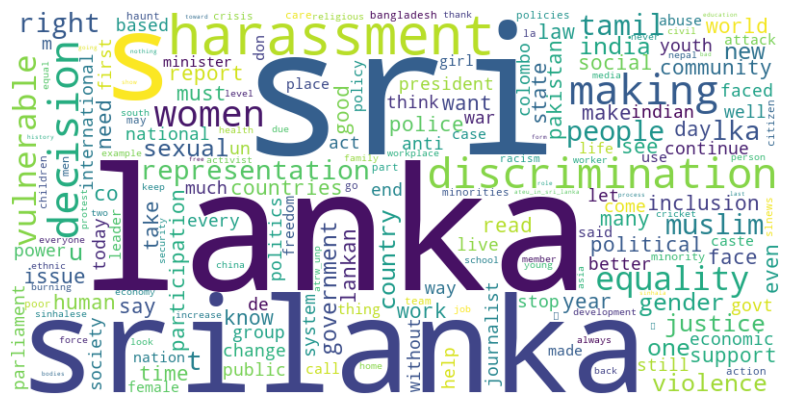

In [35]:
all_text = ' '.join(data['full_text'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations = False).generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

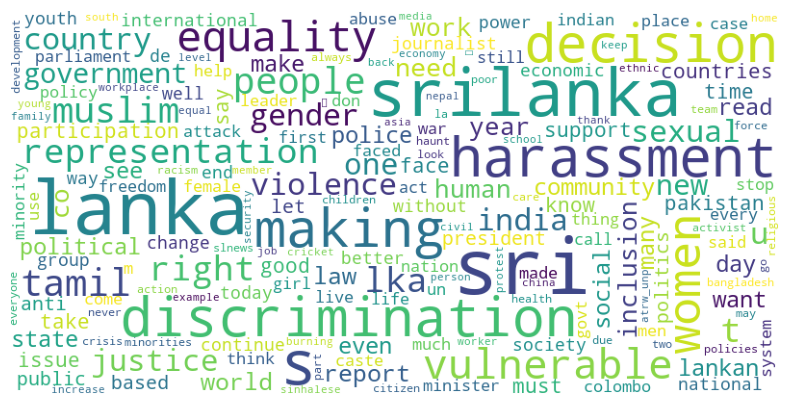

In [109]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=200, max_font_size=80, min_font_size=10,
                      colormap='viridis', collocations=False,
                      prefer_horizontal=0.9).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('twitter_wordcloud.png')
plt.show()

Subjectivity and Polarity :- In natural language processing (NLP), subjectivity and polarity are two key aspects often associated with sentiment analysis. They help in understanding the sentiments expressed in a piece of text. The polarity and subjectivity for “I do not like this example at all, it is too boring” is polarity = -1 and subjectivity is 1, which is fair. However, for the sentence “This was a helpful example but I would prefer another one”. It returns 0.0 for both subjectivity and polarity.

In [38]:
data['Polarity']=data['full_text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [39]:
data.head()

,full_text,retweet_count,views_count,Tokenized_Text,Tweets steam,Lemmatized_Text,Polarity
0,in joni simpson appointed director ilo sri la...,0,35,"[in, joni, simpson, appointed, director, ilo, ...",in joni simpson appointed director ilo sri la...,in joni simpson appoint director ilo sri lan...,0.000000
1,atilo country office srilanka maldives welco...,1,1369,"[atilo, country, office, srilanka, maldives, w...",atilo country office srilanka maldives welco...,atilo country office srilanka maldive welc...,0.136364
2,biden spending dollar17 million social cohesi...,1,6,"[biden, spending, dollar17, million, social, c...",biden spending dollar17 million social cohesi...,biden spending dollar17 million social cohes...,0.033333
3,waste day throwing dollar17 million taxpayer ...,41,2028,"[waste, day, throwing, dollar17, million, taxp...",waste day throwing dollar17 million taxpayer ...,waste day throw dollar17 million taxpayer do...,-0.158333
4,ongoing 7th asia pacific population conference...,5,569,"[ongoing, 7th, asia, pacific, population, conf...",ongoing 7th asia pacific population conference...,ongoing 7th asia pacific population conference...,0.000000


Text Stats:-Textstat is an easy to use library to calculate statistics from text. It helps determine readability, complexity, and grade level

In [40]:
import textstat
data['Text_Standard']=data['full_text'].apply(lambda x: textstat.text_standard(x))

In [41]:
print("Text Standard of the Tweets:" ,data['Text_Standard'].mode()[0])

Text Standard of the Tweets: 16th and 17th grade


In [42]:
data['Reading_Time']=data['full_text'].apply(lambda x: textstat.reading_time(x,ms_per_char=68))

In [43]:
data.head()

,full_text,retweet_count,views_count,Tokenized_Text,Tweets steam,Lemmatized_Text,Polarity,Text_Standard,Reading_Time
0,in joni simpson appointed director ilo sri la...,0,35,"[in, joni, simpson, appointed, director, ilo, ...",in joni simpson appointed director ilo sri la...,in joni simpson appoint director ilo sri lan...,0.000000,17th and 18th grade,8.02
1,atilo country office srilanka maldives welco...,1,1369,"[atilo, country, office, srilanka, maldives, w...",atilo country office srilanka maldives welco...,atilo country office srilanka maldive welc...,0.136364,19th and 20th grade,12.24
2,biden spending dollar17 million social cohesi...,1,6,"[biden, spending, dollar17, million, social, c...",biden spending dollar17 million social cohesi...,biden spending dollar17 million social cohes...,0.033333,14th and 15th grade,9.38
3,waste day throwing dollar17 million taxpayer ...,41,2028,"[waste, day, throwing, dollar17, million, taxp...",waste day throwing dollar17 million taxpayer ...,waste day throw dollar17 million taxpayer do...,-0.158333,18th and 19th grade,13.26
4,ongoing 7th asia pacific population conference...,5,569,"[ongoing, 7th, asia, pacific, population, conf...",ongoing 7th asia pacific population conference...,ongoing 7th asia pacific population conference...,0.000000,20th and 21st grade,13.46


In [44]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

data['Subjectivity']=data['full_text'].apply(getSubjectivity)

In [45]:
def getPolarityLabel(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

data['Polarity_Label'] = data['Polarity'].apply(getPolarityLabel)

In [46]:
def getSubjectivityLabel(score):
  if score < 0:
    return 'Less Subjective'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Highly Subjective'

data['Subjectivity_Label'] = data['Subjectivity'].apply(getSubjectivityLabel)

In [47]:
data['Polarity_Label'].value_counts()

Polarity_Label
Positive    1959
Negative    1159
Neutral     1111
Name: count, dtype: int64

In [48]:
data['Subjectivity_Label'].value_counts()

Subjectivity_Label
Highly Subjective    3427
Neutral               802
Name: count, dtype: int64

Text(0.5, 1.0, 'Polarity of the Tweets')

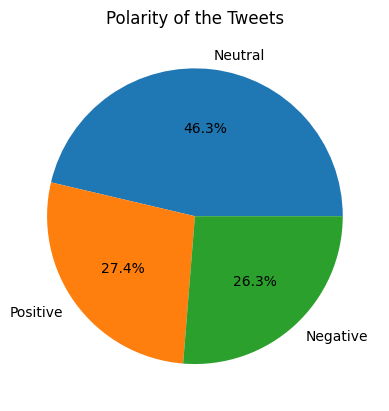

In [49]:
plt.pie(data['Polarity_Label'].value_counts(), labels=data['Polarity_Label'].unique().tolist(), autopct='%1.1f%%')
plt.title("Polarity of the Tweets")

Text(0.5, 1.0, 'Subjectivity of the Tweets')

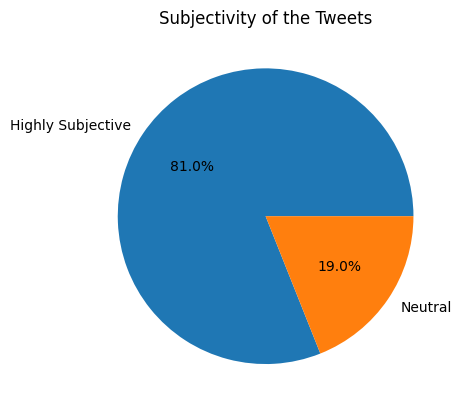

In [50]:
plt.pie(data['Subjectivity_Label'].value_counts(), labels=data['Subjectivity_Label'].unique().tolist(), autopct='%1.1f%%')
plt.title("Subjectivity of the Tweets")

In [51]:
data.head()

,full_text,retweet_count,views_count,Tokenized_Text,Tweets steam,Lemmatized_Text,Polarity,Text_Standard,Reading_Time,Subjectivity,Polarity_Label,Subjectivity_Label
0,in joni simpson appointed director ilo sri la...,0,35,"[in, joni, simpson, appointed, director, ilo, ...",in joni simpson appointed director ilo sri la...,in joni simpson appoint director ilo sri lan...,0.000000,17th and 18th grade,8.02,0.333333,Neutral,Highly Subjective
1,atilo country office srilanka maldives welco...,1,1369,"[atilo, country, office, srilanka, maldives, w...",atilo country office srilanka maldives welco...,atilo country office srilanka maldive welc...,0.136364,19th and 20th grade,12.24,0.454545,Positive,Highly Subjective
2,biden spending dollar17 million social cohesi...,1,6,"[biden, spending, dollar17, million, social, c...",biden spending dollar17 million social cohesi...,biden spending dollar17 million social cohes...,0.033333,14th and 15th grade,9.38,0.066667,Positive,Highly Subjective
3,waste day throwing dollar17 million taxpayer ...,41,2028,"[waste, day, throwing, dollar17, million, taxp...",waste day throwing dollar17 million taxpayer ...,waste day throw dollar17 million taxpayer do...,-0.158333,18th and 19th grade,13.26,0.283333,Negative,Highly Subjective
4,ongoing 7th asia pacific population conference...,5,569,"[ongoing, 7th, asia, pacific, population, conf...",ongoing 7th asia pacific population conference...,ongoing 7th asia pacific population conference...,0.000000,20th and 21st grade,13.46,0.000000,Neutral,Neutral


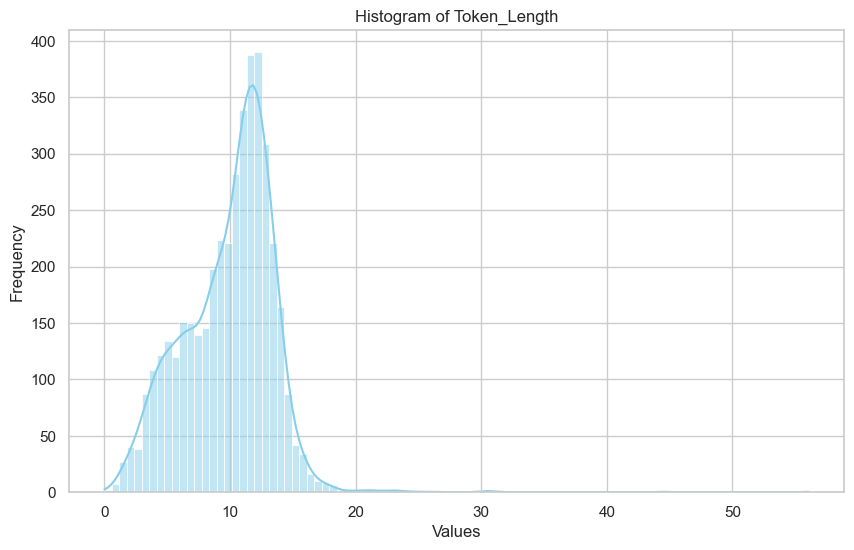

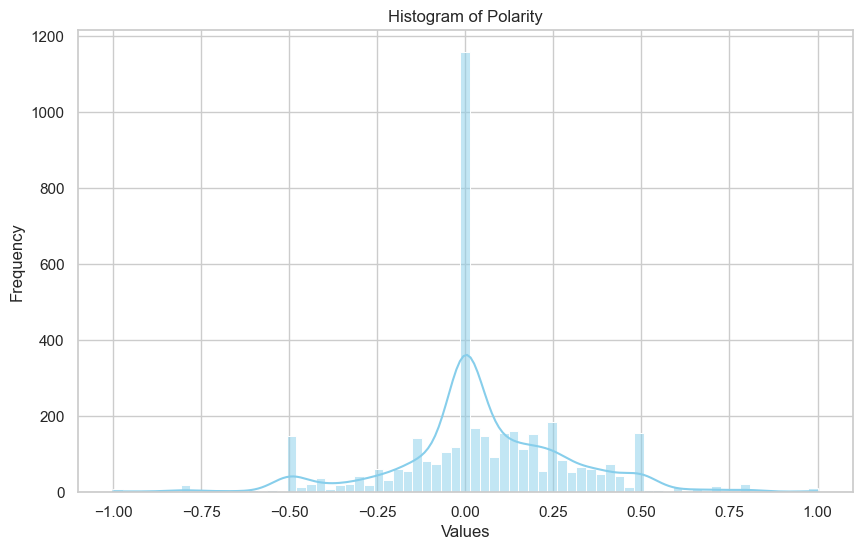

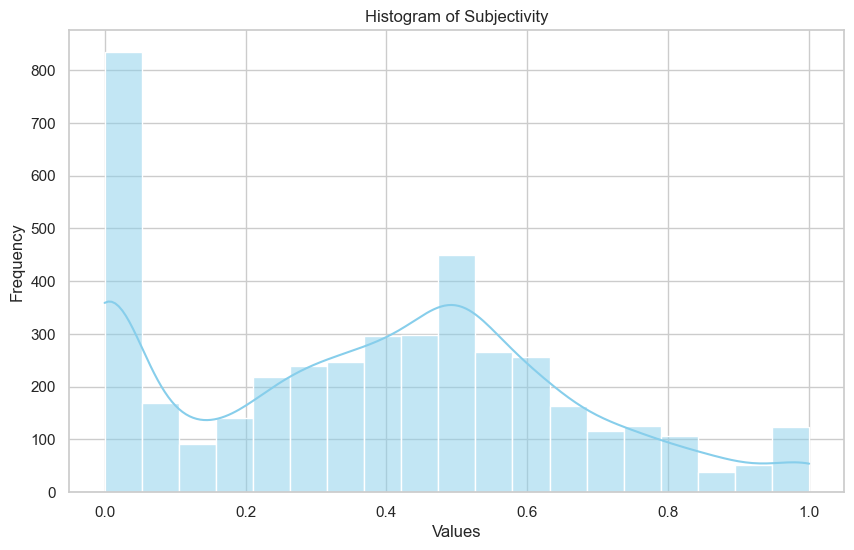

In [52]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Reading_Time'], bins='auto', kde=True, color='skyblue')
plt.title('Histogram of Token_Length')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Polarity'], bins='auto', kde=True, color='skyblue')
plt.title('Histogram of Polarity')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Subjectivity'], bins='auto', kde=True, color='skyblue')
plt.title('Histogram of Subjectivity')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [129]:
# Identify numeric columns with dtype 'int'& 'float' for extraction numerical columns 
numeric_columns= data.select_dtypes(include=['int','float']).columns

In [54]:
numeric_columns

Index(['retweet_count', 'views_count', 'Polarity', 'Reading_Time',
       'Subjectivity'],
      dtype='object')

In [55]:
#saving all numerica data in numerical data varibale for furthur use
numerical_data = data[numeric_columns]

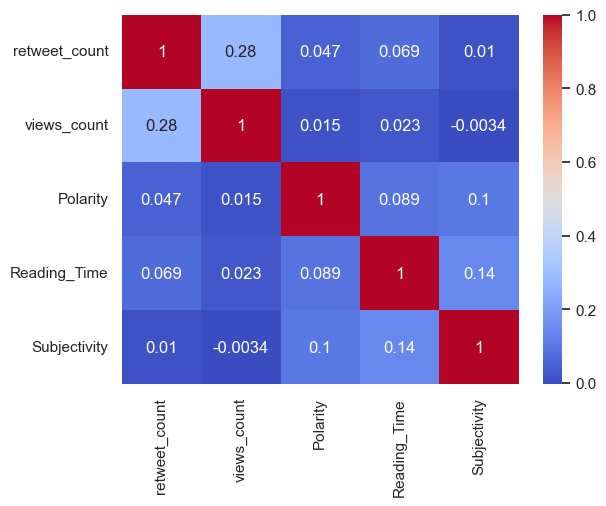

In [56]:
# Correlation Analysis on numerical data
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

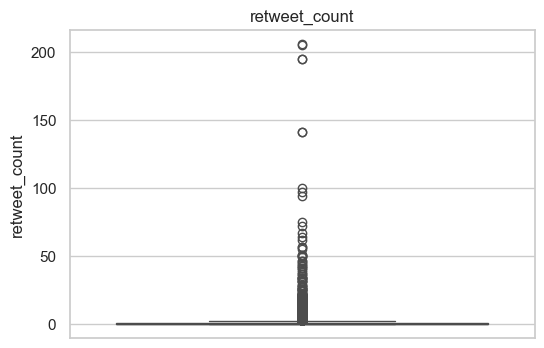

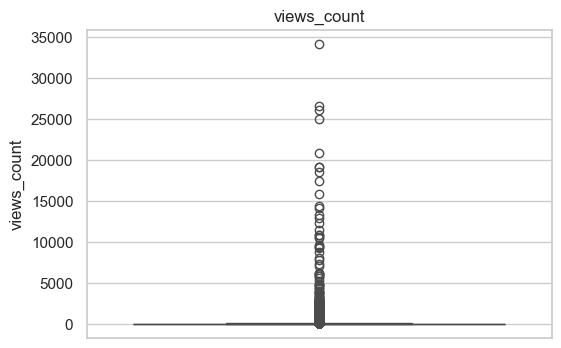

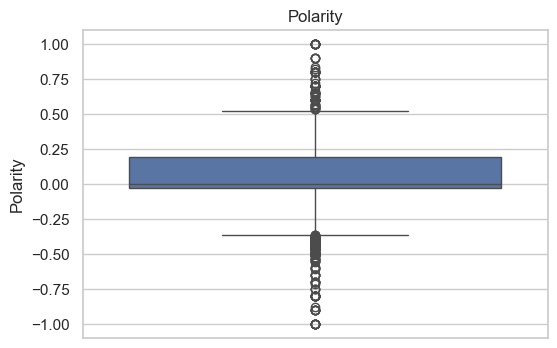

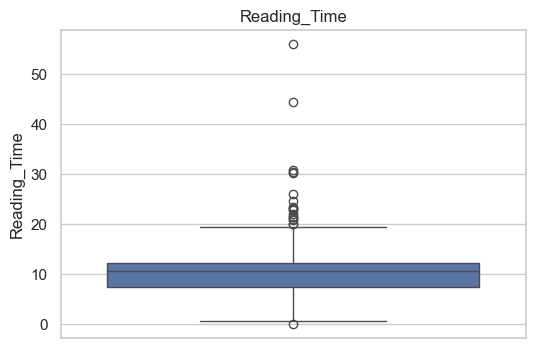

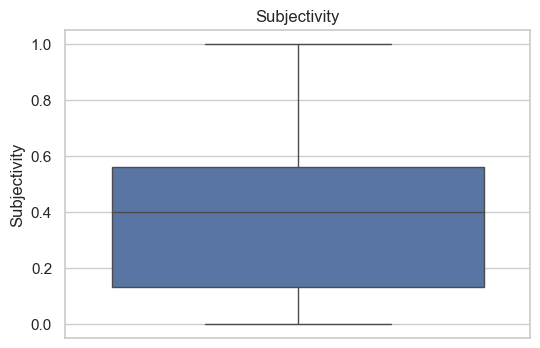

In [57]:
#outlier detection in each numerical columns by using box-plot
for col in numeric_columns:
  fig = plt.figure(figsize=(6,4))
  sns.boxplot(data[col],orient='x')
  plt.title(col)

<Figure size 16000x5000 with 0 Axes>

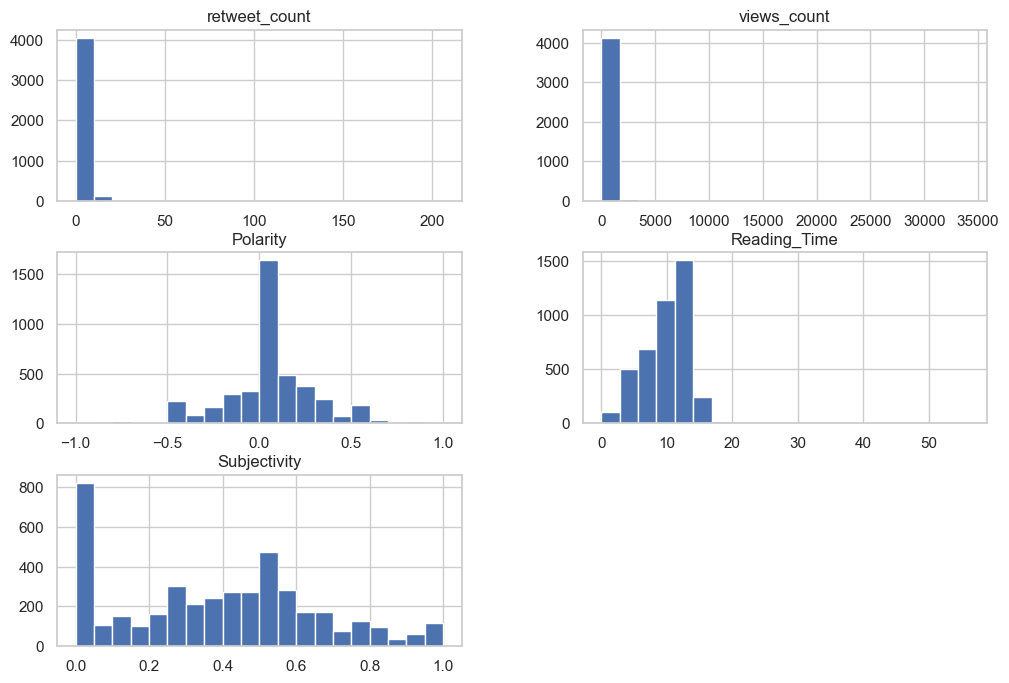

In [58]:
#now # Histograms for numeric variables
fig = plt.figure(figsize=(160,50))
numerical_data.hist(figsize=(12, 8), bins=20)
plt.show()

How Long are Tweets?

In [59]:
data['tweet_len'] = data.full_text.apply(len)

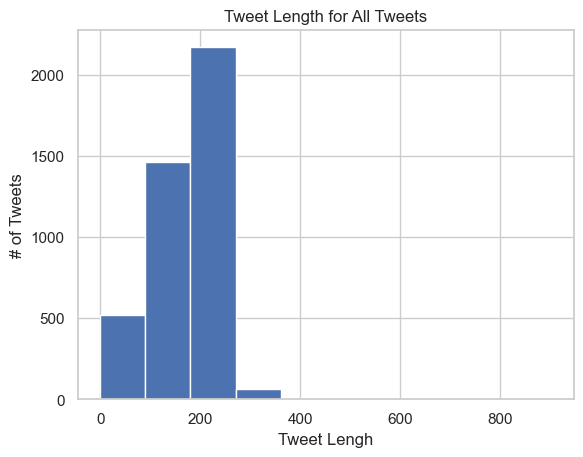

In [60]:
data.tweet_len.hist()
plt.title('Tweet Length for All Tweets')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

In [61]:
data.head()

,full_text,retweet_count,views_count,Tokenized_Text,Tweets steam,Lemmatized_Text,Polarity,Text_Standard,Reading_Time,Subjectivity,Polarity_Label,Subjectivity_Label,tweet_len
0,in joni simpson appointed director ilo sri la...,0,35,"[in, joni, simpson, appointed, director, ilo, ...",in joni simpson appointed director ilo sri la...,in joni simpson appoint director ilo sri lan...,0.000000,17th and 18th grade,8.02,0.333333,Neutral,Highly Subjective,141
1,atilo country office srilanka maldives welco...,1,1369,"[atilo, country, office, srilanka, maldives, w...",atilo country office srilanka maldives welco...,atilo country office srilanka maldive welc...,0.136364,19th and 20th grade,12.24,0.454545,Positive,Highly Subjective,214
2,biden spending dollar17 million social cohesi...,1,6,"[biden, spending, dollar17, million, social, c...",biden spending dollar17 million social cohesi...,biden spending dollar17 million social cohes...,0.033333,14th and 15th grade,9.38,0.066667,Positive,Highly Subjective,171
3,waste day throwing dollar17 million taxpayer ...,41,2028,"[waste, day, throwing, dollar17, million, taxp...",waste day throwing dollar17 million taxpayer ...,waste day throw dollar17 million taxpayer do...,-0.158333,18th and 19th grade,13.26,0.283333,Negative,Highly Subjective,238
4,ongoing 7th asia pacific population conference...,5,569,"[ongoing, 7th, asia, pacific, population, conf...",ongoing 7th asia pacific population conference...,ongoing 7th asia pacific population conference...,0.000000,20th and 21st grade,13.46,0.000000,Neutral,Neutral,240


In [64]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [65]:
data['Sentiment'] = data['full_text'].apply(lambda x:analyze_sentiment(x))

In [66]:
data.head()

,full_text,retweet_count,views_count,Tokenized_Text,Tweets steam,Lemmatized_Text,Polarity,Text_Standard,Reading_Time,Subjectivity,Polarity_Label,Subjectivity_Label,tweet_len,Sentiment
0,in joni simpson appointed director ilo sri la...,0,35,"[in, joni, simpson, appointed, director, ilo, ...",in joni simpson appointed director ilo sri la...,in joni simpson appoint director ilo sri lan...,0.000000,17th and 18th grade,8.02,0.333333,Neutral,Highly Subjective,141,0
1,atilo country office srilanka maldives welco...,1,1369,"[atilo, country, office, srilanka, maldives, w...",atilo country office srilanka maldives welco...,atilo country office srilanka maldive welc...,0.136364,19th and 20th grade,12.24,0.454545,Positive,Highly Subjective,214,1
2,biden spending dollar17 million social cohesi...,1,6,"[biden, spending, dollar17, million, social, c...",biden spending dollar17 million social cohesi...,biden spending dollar17 million social cohes...,0.033333,14th and 15th grade,9.38,0.066667,Positive,Highly Subjective,171,1
3,waste day throwing dollar17 million taxpayer ...,41,2028,"[waste, day, throwing, dollar17, million, taxp...",waste day throwing dollar17 million taxpayer ...,waste day throw dollar17 million taxpayer do...,-0.158333,18th and 19th grade,13.26,0.283333,Negative,Highly Subjective,238,-1
4,ongoing 7th asia pacific population conference...,5,569,"[ongoing, 7th, asia, pacific, population, conf...",ongoing 7th asia pacific population conference...,ongoing 7th asia pacific population conference...,0.000000,20th and 21st grade,13.46,0.000000,Neutral,Neutral,240,0


In [67]:
data['Sentiment'].value_counts(normalize = True)

Sentiment
 1    0.463939
-1    0.274060
 0    0.262000
Name: proportion, dtype: float64

In [72]:
data.Sentiment.value_counts()

Sentiment
 1    1962
-1    1159
 0    1108
Name: count, dtype: int64

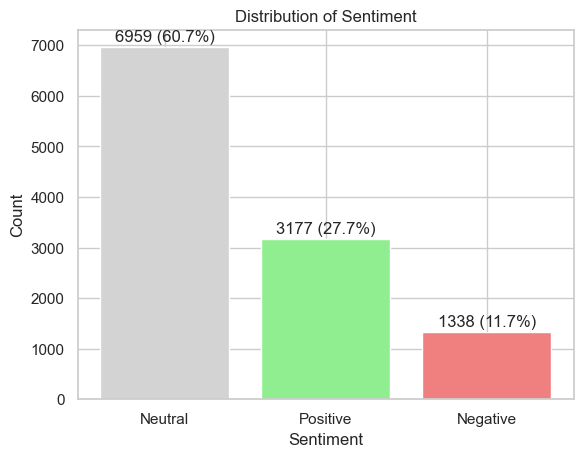

In [73]:
x = ['Neutral', 'Positive', 'Negative']
y = [6959, 3177, 1338]

fig, ax = plt.subplots()
ax.bar(x, y, color=['lightgrey', 'lightgreen', 'lightcoral'])

# Add labels and title
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sentiment')

# Add data labels
for i, v in enumerate(y):
    ax.text(i, v + 50, f'{v} ({v / sum(y) * 100:.1f}%)', ha='center', va='bottom')

plt.show()


In [82]:
data['Tweet_Length'] = data['full_text'].apply(len)

In [83]:
neutral = data[data['Sentiment'] == 0]
positive = data[data['Sentiment'] == 1]
negative = data[data['Sentiment'] == -1]

In [84]:
#neutral_text
print("Neutral tweet example  :",neutral['full_text'].values[1])
print()
# Positive tweet
print("Positive Tweet example :",positive['full_text'].values[1])
print()
#negative_text
print("Negative Tweet example :",negative['full_text'].values[1])

Neutral tweet example  : ongoing 7th asia pacific population conference   srilanka shared progress made   renewed commitment implement  icpd poa  nairobi pledge accelerate investment  srhr  youth inclusion  gender equality  climate resilience  elderly care   data 4

Positive Tweet example : biden spending dollar17 million  social cohesion    sri lanka  biden spending dollar17 million  social cohesion    sri lanka  demands  gender social inclusion  analysis s2

Negative Tweet example : lala studio creates functional upcycled products support sustainability inclusion enable people wear values  use discarded pants garment waste textile industry sri lanka produce gender neutral     s   t co azssmlpgr4


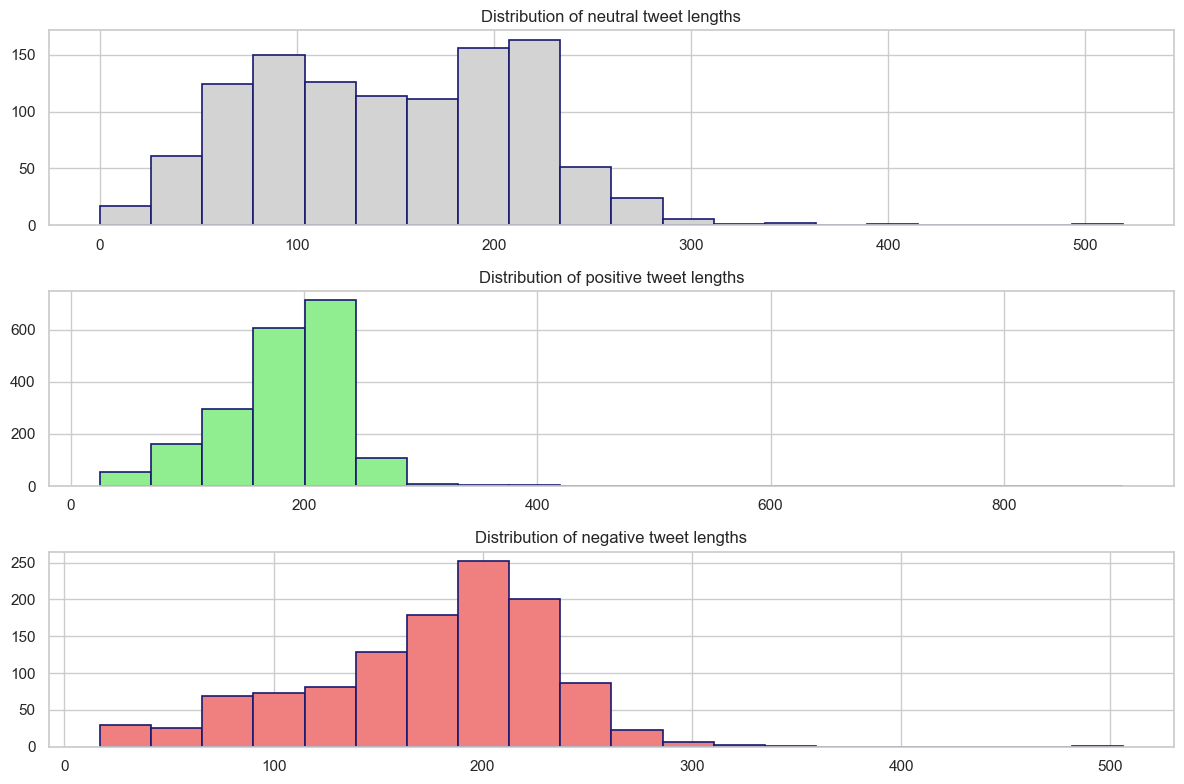

In [86]:
# Plotting histograms for each sentiment category
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(neutral['Tweet_Length'], bins=20, color='lightgrey', edgecolor='midnightblue', linewidth=1.2)
plt.title('Distribution of neutral tweet lengths')

plt.subplot(3, 1, 2)
plt.hist(positive['Tweet_Length'], bins=20, color='lightgreen', edgecolor='midnightblue', linewidth=1.2)
plt.title('Distribution of positive tweet lengths')

plt.subplot(3, 1, 3)
plt.hist(negative['Tweet_Length'], bins=20, color='lightcoral', edgecolor='midnightblue', linewidth=1.2)
plt.title('Distribution of negative tweet lengths')

plt.tight_layout()
plt.show()

In [89]:
# Extracting tweet lengths for each sentiment category
y1 = neutral['Tweet_Length'].values
y2 = positive['Tweet_Length'].values
y3 = negative['Tweet_Length'].values

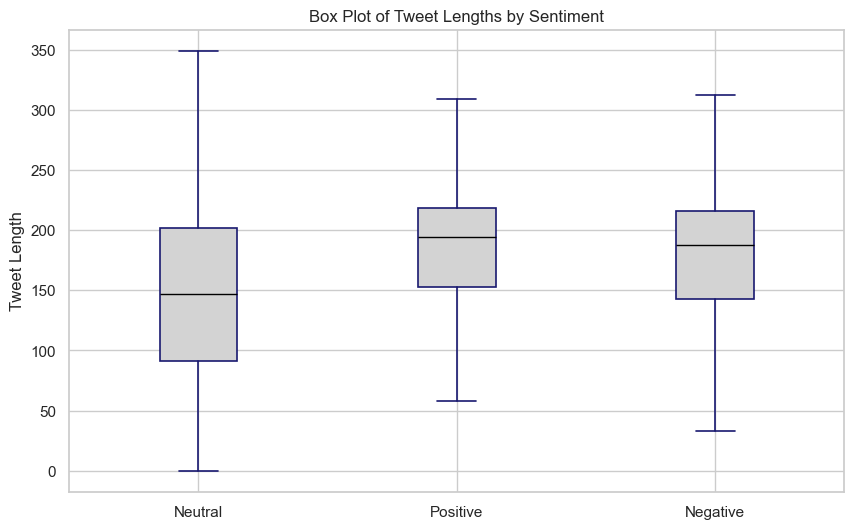

In [90]:
# Plotting box plots for each sentiment category
plt.figure(figsize=(10, 6))

plt.boxplot([y1, y2, y3], labels=['Neutral', 'Positive', 'Negative'], showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='lightgrey', color='midnightblue', linewidth=1.2),
            capprops=dict(color='midnightblue', linewidth=1.2),
            whiskerprops=dict(color='midnightblue', linewidth=1.2),
            medianprops=dict(color='black'))

plt.title('Box Plot of Tweet Lengths by Sentiment')
plt.ylabel('Tweet Length')
plt.show()

In [93]:
from nltk.tokenize import word_tokenize
import nltk

In [95]:
neutral

,full_text,retweet_count,views_count,Tokenized_Text,Tweets steam,Lemmatized_Text,Polarity,Text_Standard,Reading_Time,Subjectivity,Polarity_Label,Subjectivity_Label,tweet_len,Sentiment,Tweet_Length
0,in joni simpson appointed director ilo sri la...,0,35,"[in, joni, simpson, appointed, director, ilo, ...",in joni simpson appointed director ilo sri la...,in joni simpson appoint director ilo sri lan...,0.0,17th and 18th grade,8.02,0.333333,Neutral,Highly Subjective,141,0,141
4,ongoing 7th asia pacific population conference...,5,569,"[ongoing, 7th, asia, pacific, population, conf...",ongoing 7th asia pacific population conference...,ongoing 7th asia pacific population conference...,0.0,20th and 21st grade,13.46,0.000000,Neutral,Neutral,240,0,240
9,session gender transforming mentalies empowe...,0,0,"[session, gender, transforming, mentalies, emp...",session gender transforming mentalies empowe...,session gender transform mentalie empower ...,0.0,17th and 18th grade,11.15,0.000000,Neutral,Neutral,196,0,196
10,empowering change together prcs joins hands n...,0,133,"[empowering, change, together, prcs, joins, ha...",empowering change together prcs joins hands n...,empower change together prcs join hand norcr...,0.0,25th and 26th grade,13.46,0.000000,Neutral,Neutral,231,0,231
12,dyk 9 5percent existing key policies strateg...,14,6122,"[dyk, 9, 5percent, existing, key, policies, st...",dyk 9 5percent existing key policies strateg...,dyk 9 5percent exist key policy strategy ...,0.0,22nd and 23rd grade,12.38,0.666667,Neutral,Highly Subjective,226,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,blairite equality act ruining britain,0,5,"[blairite, equality, act, ruining, britain]",blairite equality act ruining britain,blairite equality act ruin britain,0.0,16th and 17th grade,2.24,0.000000,Neutral,Neutral,37,0,37
4221,honoring fearless spirit netaji subhash chandr...,0,13,"[honoring, fearless, spirit, netaji, subhash, ...",honoring fearless spirit netaji subhash chandr...,honor fearless spirit netaji subhash chandra b...,0.0,21st and 22nd grade,12.51,0.000000,Neutral,Neutral,216,0,216
4224,atdjshacho_foxx atbacara_brave9_0 お願いします,0,21,"[atdjshacho_foxx, atbacara_brave9_0, お願いします]",atdjshacho_foxx atbacara_brave9_0 お願いします,atdjshacho_foxx atbacara_brave9_0 お願いします,0.0,-1th and 0th grade,2.58,0.000000,Neutral,Neutral,40,0,40
4227,blairite equality act ruining britain sceptics,0,13,"[blairite, equality, act, ruining, britain, sc...",blairite equality act ruining britain scept,blairite equality act ruin britain sceptic,0.0,7th and 8th grade,2.79,0.000000,Neutral,Neutral,46,0,46


In [99]:
# defining function for calculating word count
def calculate_word_count(text):
    tokens = word_tokenize(text)
    return len(tokens)

# Calculate word count and create new 'word_count' columns for each sentiment category
neutral['word_count'] = neutral['full_text'].apply(calculate_word_count)
positive['word_count'] = positive['full_text'].apply(calculate_word_count)
negative['word_count'] = negative['full_text'].apply(calculate_word_count)

# Extracting word counts for each sentiment category
x1 = neutral['word_count'].values
x2 = positive['word_count'].values
x3 = negative['word_count'].values

C:\Users\rajkr\AppData\Local\Temp\ipykernel_13968\1380355436.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rajkr\AppData\Local\Temp\ipykernel_13968\1380355436.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rajkr\AppData\Local\Temp\ipykernel_13968\1380355436.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

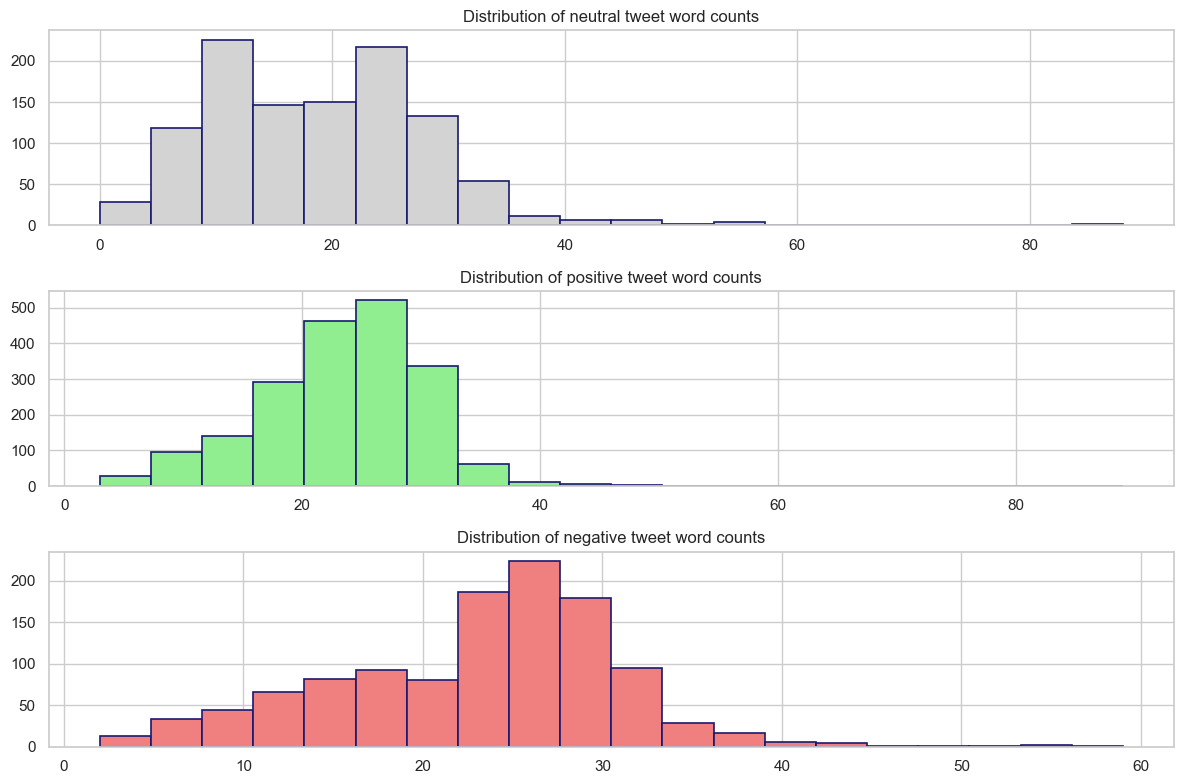

In [100]:
# Plotting histograms for each sentiment category
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(x1, bins=20, color='lightgrey', edgecolor='midnightblue', linewidth=1.2)
plt.title('Distribution of neutral tweet word counts')

plt.subplot(3, 1, 2)
plt.hist(x2, bins=20, color='lightgreen', edgecolor='midnightblue', linewidth=1.2)
plt.title('Distribution of positive tweet word counts')

plt.subplot(3, 1, 3)
plt.hist(x3, bins=20, color='lightcoral', edgecolor='midnightblue', linewidth=1.2)
plt.title('Distribution of negative tweet word counts')

plt.tight_layout()
plt.show()

In [125]:
def wordcloud(df, text = 'full_text'):
    
    # Join all tweets in one string
    corpus = " ".join(str(review) for review in df[text])
    
    print (f"There are {len(corpus)} words in the combination of all review.")
    
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          collocations=False,
                          background_color="white").generate(corpus)
    
    plt.figure(figsize=(10,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.savefig('wordcloud.png')
    plt.show()
    print()

Neutral Wordcloud
There are 164372 words in the combination of all review.


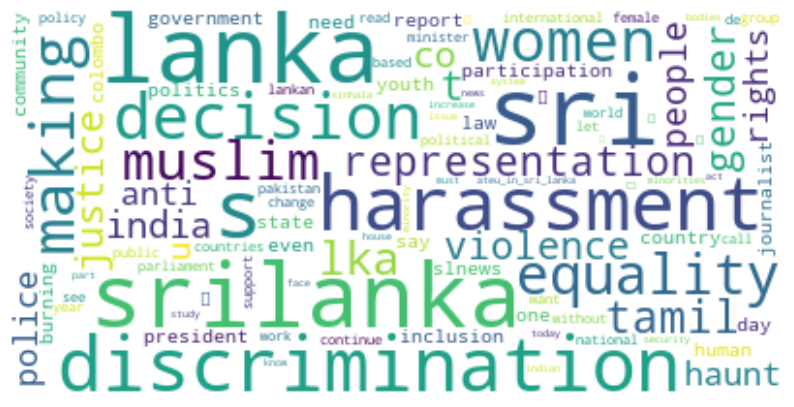

In [126]:
print('Neutral Wordcloud')
wordcloud(df = neutral)

Positive Wordcloud
There are 363275 words in the combination of all review.


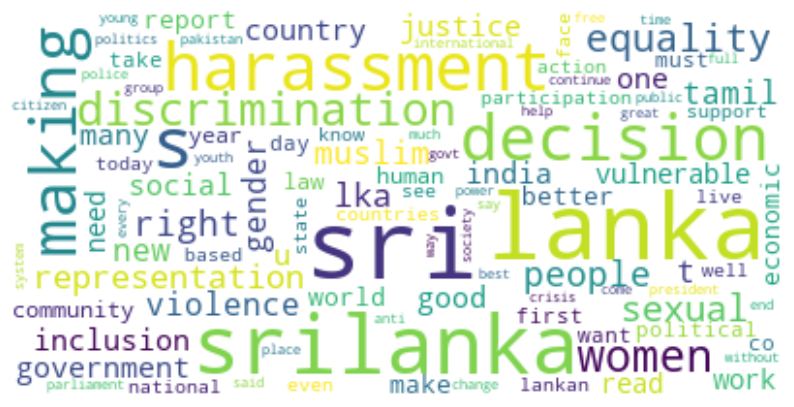

In [127]:
print('Positive Wordcloud')
wordcloud(df = positive)

Negative Wordcloud
There are 204805 words in the combination of all review.


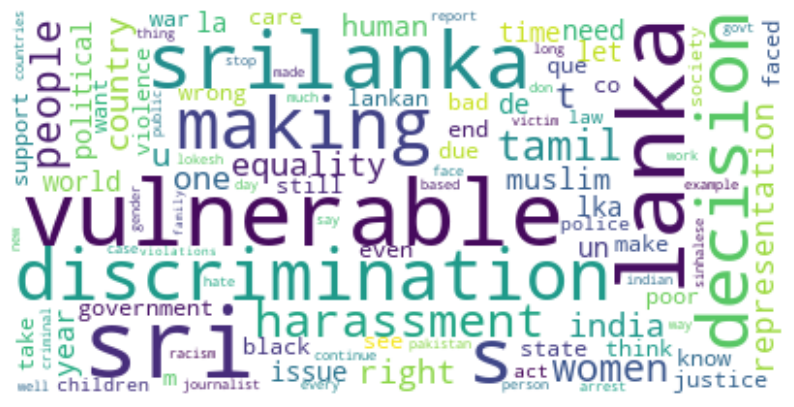

In [128]:
print('Negative Wordcloud')
wordcloud(df = negative)

# Completed 